In [ ]:
pip install -q seaborn

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
np.set_printoptions(precision=3, suppress=True)


In [5]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.11.0


In [39]:
column_names = ['Record', 'Date', 'Temp(F)', 'Temp(C)', 'dew_pt', 'hum', 'Wind Speed(mph)', 'Wind Speed(m/s)',
                'wind_gust', 'dir', 'vis', 'pressure', 'wind_chill', 'heat_index', 'precip', 'precip_rate',
                'precip_total', 'WeatherCondition', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado', 'Condition']
raw_dataset = pd.read_csv('NYWeather_2016_CSV_TimeCleaned.csv')
dataset = raw_dataset.copy()
dataset.head()

,Record,Date,TIMEVALUE,Serial Time,Time Test,Temp (F),Temp (C ),dew_pt,hum,Wind Speed (mph),...,precip_rate,precip_total,Weather Condition,fog,rain,snow,hail,thunder,tornado,Condition
0,47,1/2/2016 22:51,10:51:00 PM,3660936660,1.0,36.0,2.22,19.9,52,11.5,...,NaN,NaN,Clear,0,0,0,0,0,0,1
1,48,1/2/2016 23:51,11:51:00 PM,3660940260,1.0,36.0,2.22,21.9,57,12.7,...,NaN,NaN,Clear,0,0,0,0,0,0,1
2,49,1/3/2016 0:51,12:51:00 AM,3660943860,1.0,36.0,2.22,21.9,57,12.7,...,NaN,NaN,Clear,0,0,0,0,0,0,1
3,50,1/3/2016 1:51,1:51:00 AM,3660947460,1.0,36.0,2.22,24.1,62,11.5,...,NaN,NaN,Clear,0,0,0,0,0,0,1
4,56,1/3/2016 7:51,7:51:00 AM,3660969060,1.0,39.9,4.39,27.0,60,12.7,...,NaN,NaN,Clear,0,0,0,0,0,0,1


In [40]:
dataset.isna().sum()

Record                  0
Date                    0
TIMEVALUE               0
Serial Time             0
Time Test               0
Temp (F)                0
Temp (C )               0
dew_pt                  0
hum                     0
Wind Speed (mph)        0
Wind Speed (m/s)        0
Vh                      0
Power Generation        0
KWH                     0
Capacity Factor         0
wind_gust            7131
dir                     0
vis                     0
pressure                0
wind_chill           6203
heat_index           8100
precip               7744
precip_rate          8784
precip_total         8784
Weather Condition       0
fog                     0
rain                    0
snow                    0
hail                    0
thunder                 0
tornado                 0
Condition               0
dtype: int64

In [41]:
to_drop = ['wind_gust', 'wind_chill', 'heat_index', 'precip', 'precip_rate', 'precip_total', 'Serial Time', 'Time Test', 'Vh', 'Power Generation', 'KWH', 'Capacity Factor']
dataset = dataset.drop(to_drop, axis=1)
dataset.head()

,Record,Date,TIMEVALUE,Temp (F),Temp (C ),dew_pt,hum,Wind Speed (mph),Wind Speed (m/s),dir,vis,pressure,Weather Condition,fog,rain,snow,hail,thunder,tornado,Condition
0,47,1/2/2016 22:51,10:51:00 PM,36.0,2.22,19.9,52,11.5,5.14,WSW,10.0,29.99,Clear,0,0,0,0,0,0,1
1,48,1/2/2016 23:51,11:51:00 PM,36.0,2.22,21.9,57,12.7,5.68,WSW,10.0,29.98,Clear,0,0,0,0,0,0,1
2,49,1/3/2016 0:51,12:51:00 AM,36.0,2.22,21.9,57,12.7,5.68,WSW,10.0,29.96,Clear,0,0,0,0,0,0,1
3,50,1/3/2016 1:51,1:51:00 AM,36.0,2.22,24.1,62,11.5,5.14,WSW,10.0,29.96,Clear,0,0,0,0,0,0,1
4,56,1/3/2016 7:51,7:51:00 AM,39.9,4.39,27.0,60,12.7,5.68,WSW,10.0,29.87,Clear,0,0,0,0,0,0,1


In [9]:
dataset.loc[dataset["dir"] == "NW", "dir"] = 315
dataset.loc[dataset["dir"] == "East", "dir"] = 90
dataset.loc[dataset["dir"] == "West", "dir"] = 270
dataset.loc[dataset["dir"] == "ENE", "dir"] = 67.5
dataset.loc[dataset["dir"] == "ESE", "dir"] = 112.5
dataset.loc[dataset["dir"] == "NE", "dir"] = 45
dataset.loc[dataset["dir"] == "NNE", "dir"] = 22.5
dataset.loc[dataset["dir"] == "NNW", "dir"] = 337.5
dataset.loc[dataset["dir"] == "North", "dir"] = 0
dataset.loc[dataset["dir"] == "SE", "dir"] = 135
dataset.loc[dataset["dir"] == "South", "dir"] = 180
dataset.loc[dataset["dir"] == "SSE", "dir"] = 157.5
dataset.loc[dataset["dir"] == "SSW", "dir"] = 202.5
dataset.loc[dataset["dir"] == "SW", "dir"] = 225
dataset.loc[dataset["dir"] == "WNW", "dir"] = 292.6
dataset.loc[dataset["dir"] == "WSW", "dir"] = 247.5

In [10]:
dataset['Weather Condition'] = dataset['Weather Condition'].map({'Mist': 'Mist', 'Overcast': 'Overcast', 'Light Drizzle': 'Light Drizzle',
                                                                'Heavy Rain': 'Heavy Rain', 'Light Rain': 'Light Rain',  'Light Snow': 'Light Snow',
                                                                'Heavy Snow': 'Heavy Snow', 'Light Ice Pellets': 'Light Ice Pellets', 'Shallow Fog': 'Shallow Fog', 
                                                                'Light Thunderstorms and Rain': 'Light Thunderstorms and Rain', 'Thunderstorm': 'Thunderstorm', 'Scattered Clouds': 'Scattered Clouds', 
                                                                'Partly Cloudy': 'Partly Cloudy', 'Mostly Cloudy': 'Mostly Cloudy', 'Light Freezing Rain': 'Light Freezing Rain', 'Heavy Thunderstorms and Rain': 'Heavy Thunderstorms and Rain', 
                                                                'Haze': 'Haze', 'Clear': 'Clear', 'Blowing Snow': 'Blowing Snow'
                                                                })
dataset = pd.get_dummies(dataset, columns=['Weather Condition'], prefix='', prefix_sep='')
dataset.tail()

,Record,Date,Temp (F),Temp (C ),dew_pt,hum,Wind Speed (mph),Wind Speed (m/s),dir,vis,...,Light Rain,Light Snow,Light Thunderstorms and Rain,Mist,Mostly Cloudy,Overcast,Partly Cloudy,Scattered Clouds,Shallow Fog,Thunderstorm
8779,8653,12/26/2016 12:51,43.0,6.11,30.9,62,9.2,4.11,90,10.0,...,0,0,0,0,0,1,0,0,0,0
8780,8713,12/29/2016 0:51,30.9,-0.61,21.0,67,3.5,1.56,90,10.0,...,0,0,0,0,1,0,0,0,0,0
8781,8714,12/29/2016 1:51,28.9,-1.72,21.9,75,3.5,1.56,90,10.0,...,0,0,0,0,1,0,0,0,0,0
8782,8715,12/29/2016 2:51,30.0,-1.11,19.9,66,4.6,2.06,90,10.0,...,0,0,0,0,0,1,0,0,0,0
8783,8727,12/29/2016 14:51,46.9,8.28,43.0,86,3.5,1.56,90,1.5,...,1,0,0,0,0,0,0,0,0,0


In [11]:
dataset.Date.head()

0    1/2/2016 22:51
1    1/2/2016 23:51
2     1/3/2016 0:51
3     1/3/2016 1:51
4     1/3/2016 7:51
Name: Date, dtype: object

In [12]:
#dataset.TIMEVALUE.head()

In [13]:
dataset['Date'] = pd.to_datetime(dataset['Date'],
                                 format = '%m/%d/%Y %H:%M',
                                 errors = 'coerce')

                                              

In [14]:
dataset['Date'] = pd.to_numeric(pd.to_datetime(dataset['Date']))
dataset['dir'] = pd.to_numeric(dataset['dir'])
#dataset['TIMEVALUE'] = pd.to_numeric(dataset['TIMEVALUE'])

In [15]:
dataset.tail()

,Record,Date,Temp (F),Temp (C ),dew_pt,hum,Wind Speed (mph),Wind Speed (m/s),dir,vis,...,Light Rain,Light Snow,Light Thunderstorms and Rain,Mist,Mostly Cloudy,Overcast,Partly Cloudy,Scattered Clouds,Shallow Fog,Thunderstorm
8779,8653,1482756660000000000,43.0,6.11,30.9,62,9.2,4.11,90.0,10.0,...,0,0,0,0,0,1,0,0,0,0
8780,8713,1482972660000000000,30.9,-0.61,21.0,67,3.5,1.56,90.0,10.0,...,0,0,0,0,1,0,0,0,0,0
8781,8714,1482976260000000000,28.9,-1.72,21.9,75,3.5,1.56,90.0,10.0,...,0,0,0,0,1,0,0,0,0,0
8782,8715,1482979860000000000,30.0,-1.11,19.9,66,4.6,2.06,90.0,10.0,...,0,0,0,0,0,1,0,0,0,0
8783,8727,1483023060000000000,46.9,8.28,43.0,86,3.5,1.56,90.0,1.5,...,1,0,0,0,0,0,0,0,0,0


In [16]:
dataset.isna().sum()

Record                          0
Date                            0
Temp (F)                        0
Temp (C )                       0
dew_pt                          0
hum                             0
Wind Speed (mph)                0
Wind Speed (m/s)                0
dir                             0
vis                             0
pressure                        0
fog                             0
rain                            0
snow                            0
hail                            0
thunder                         0
tornado                         0
Condition                       0
Blowing Snow                    0
Clear                           0
Haze                            0
Heavy Rain                      0
Heavy Snow                      0
Heavy Thunderstorms and Rain    0
Light Drizzle                   0
Light Freezing Rain             0
Light Rain                      0
Light Snow                      0
Light Thunderstorms and Rain    0
Mist          

In [17]:
train_dataset = dataset.sample(frac=0.8, random_state=0)

test_dataset  = dataset.drop(train_dataset.index)

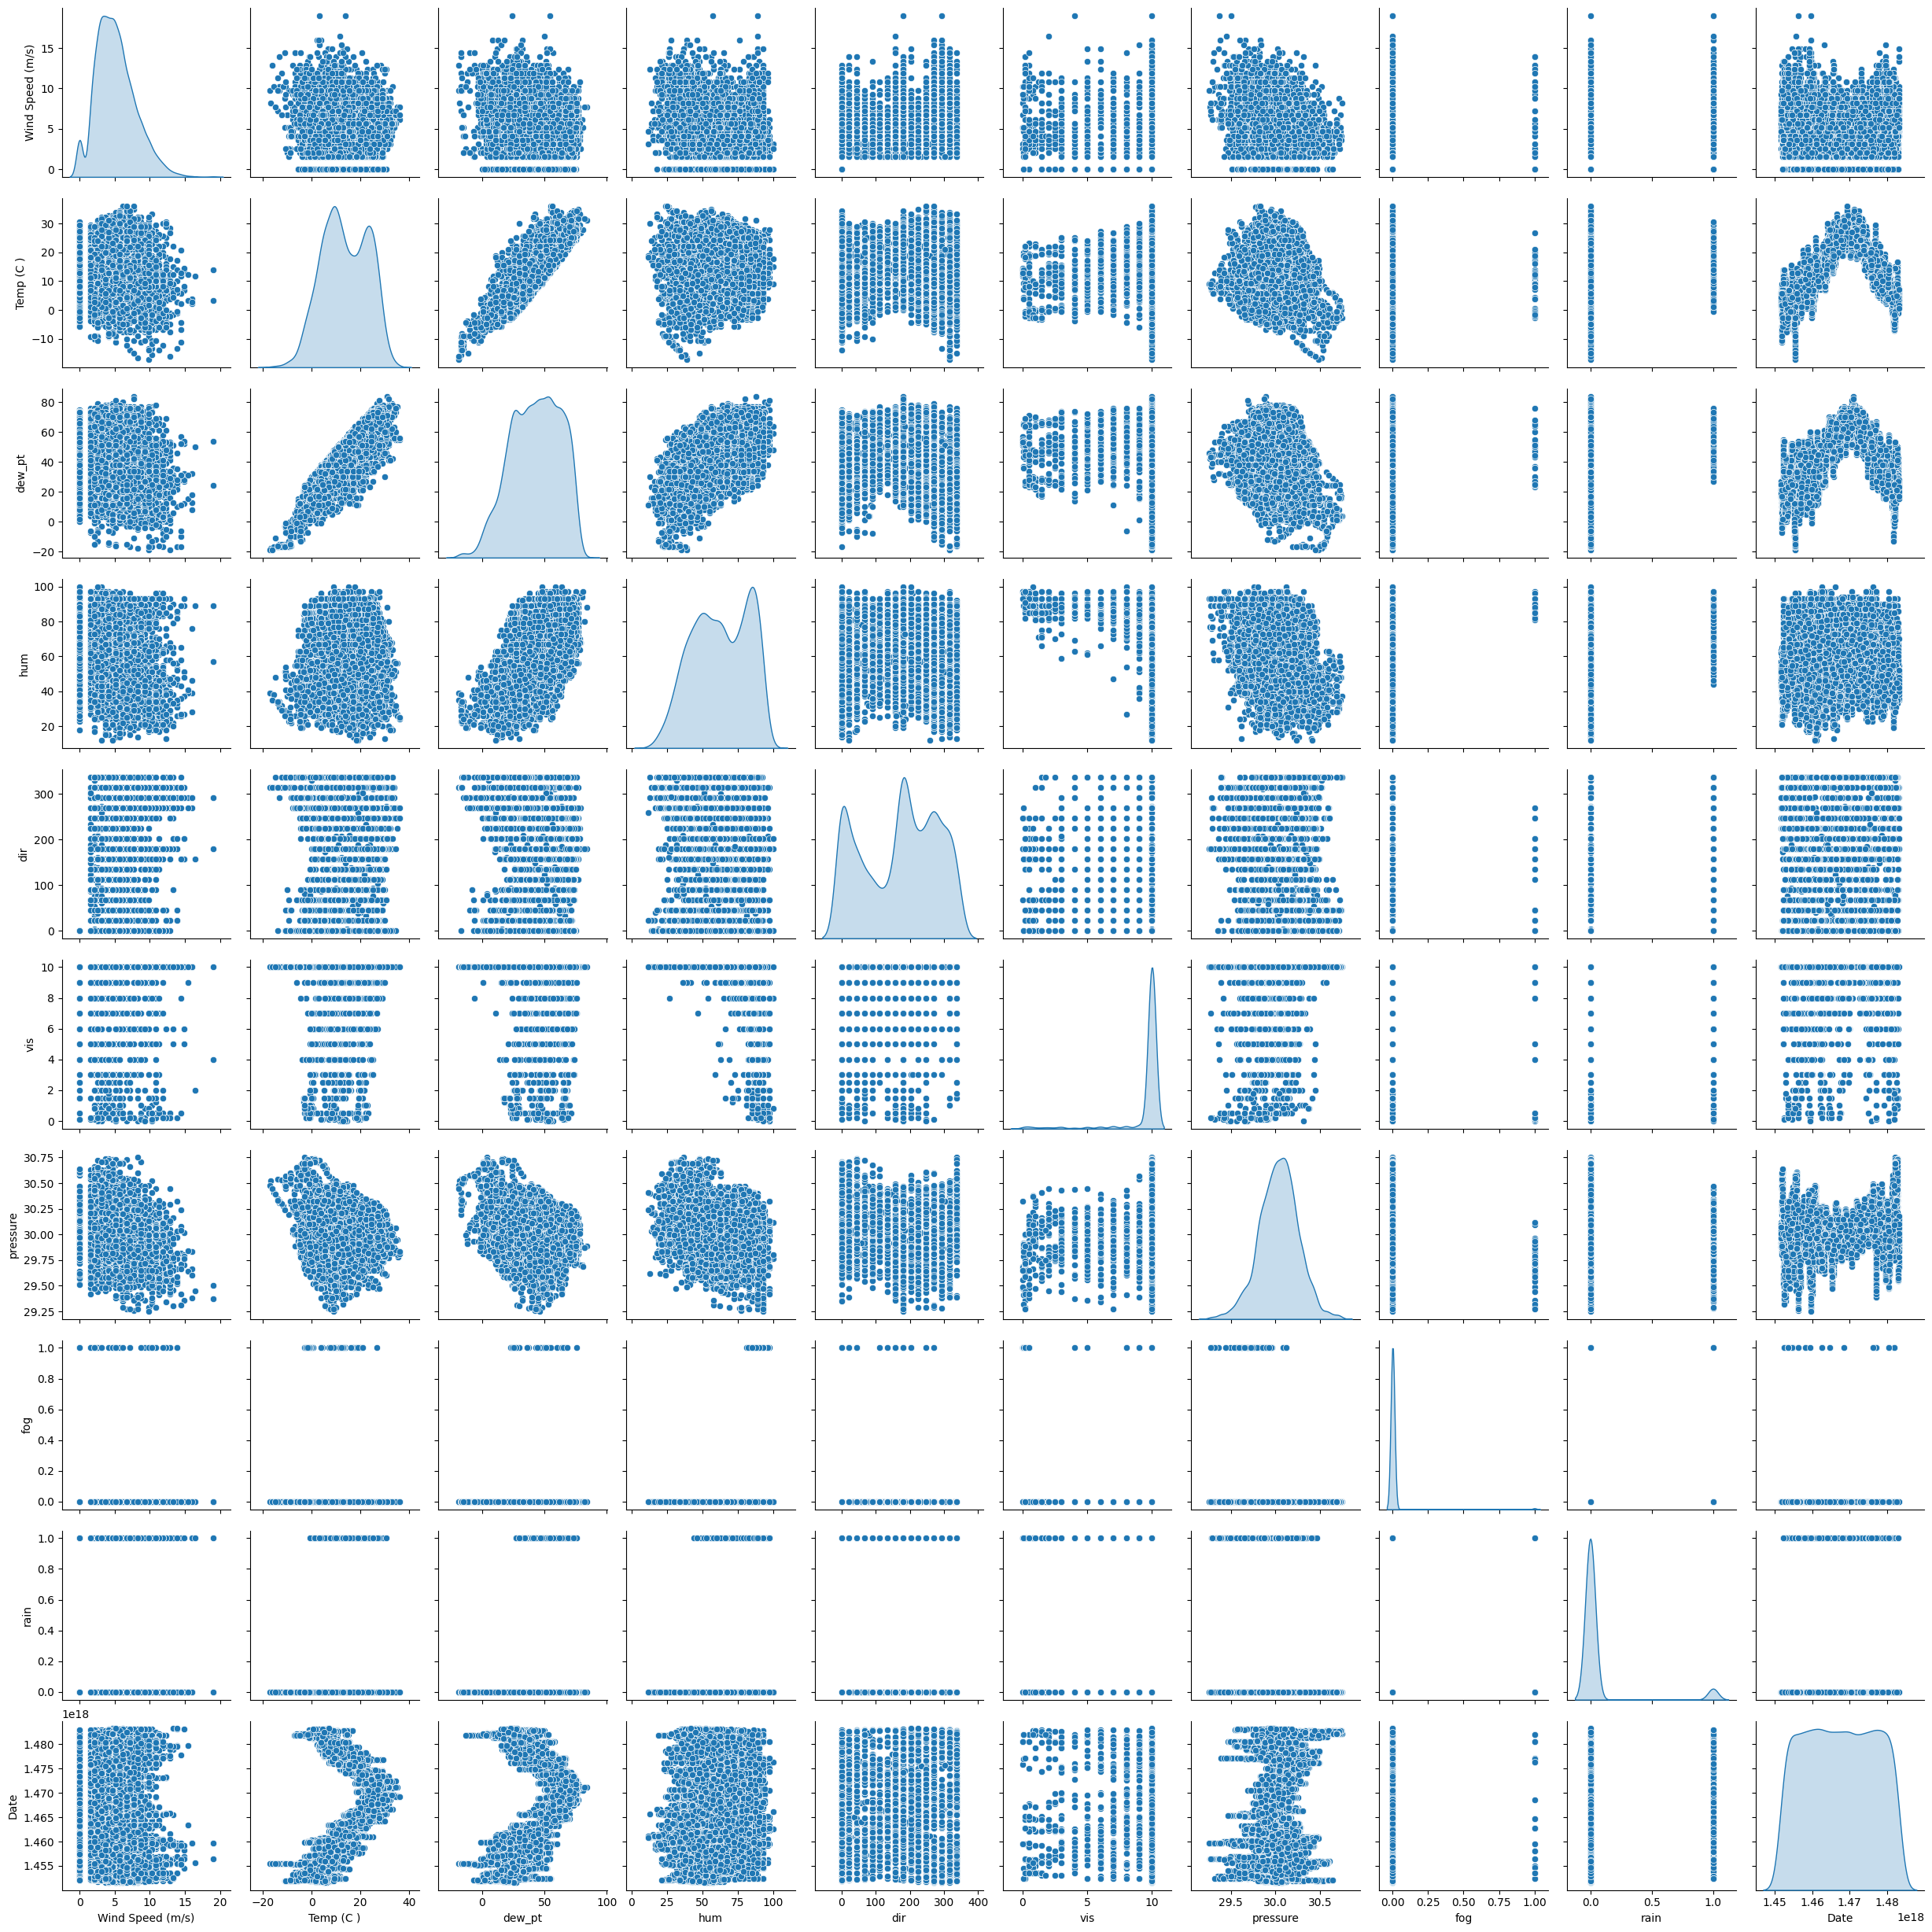

In [18]:
#must add dir
sns.pairplot(train_dataset[['Wind Speed (m/s)', 'Temp (C )', 'dew_pt', 'hum', 'dir', 'vis', 'pressure', 'fog', 'rain', 'Date']], diag_kind='kde')

In [19]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Record,7027.0,4.392867e+03,2.539966e+03,1.000000e+00,2.206500e+03,4.379000e+03,6.607500e+03,8.784000e+03
Date,7027.0,1.467420e+18,9.143919e+15,1.451609e+18,1.459549e+18,1.467370e+18,1.475393e+18,1.483228e+18
Temp (F),7027.0,5.659081e+01,1.690455e+01,1.000000e+00,4.410000e+01,5.590000e+01,7.110000e+01,9.700000e+01
Temp (C ),7027.0,1.366154e+01,9.391406e+00,-1.722000e+01,6.720000e+00,1.328000e+01,2.172000e+01,3.611000e+01
dew_pt,7027.0,4.267740e+01,1.965536e+01,-1.890000e+01,2.700000e+01,4.410000e+01,5.900000e+01,8.400000e+01
hum,7027.0,6.260723e+01,1.971458e+01,1.200000e+01,4.700000e+01,6.300000e+01,8.100000e+01,1.000000e+02
Wind Speed (mph),7027.0,1.146001e+01,6.171578e+00,0.000000e+00,6.900000e+00,1.040000e+01,1.500000e+01,4.260000e+01
Wind Speed (m/s),7027.0,5.122647e+00,2.759590e+00,0.000000e+00,3.080000e+00,4.650000e+00,6.710000e+00,1.904000e+01
dir,7027.0,1.706488e+02,1.085470e+02,0.000000e+00,6.750000e+01,1.800000e+02,2.700000e+02,3.375000e+02
vis,7027.0,9.480803e+00,1.803074e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01


In [20]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Wind Speed (m/s)')
test_labels  = test_features.pop('Wind Speed (m/s)')

In [21]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Record,4.392867e+03,2.539966e+03
Date,1.467420e+18,9.143919e+15
Temp (F),5.659081e+01,1.690455e+01
Temp (C ),1.366154e+01,9.391406e+00
dew_pt,4.267740e+01,1.965536e+01
hum,6.260723e+01,1.971458e+01
Wind Speed (mph),1.146001e+01,6.171578e+00
Wind Speed (m/s),5.122647e+00,2.759590e+00
dir,1.706488e+02,1.085470e+02
vis,9.480803e+00,1.803074e+00


In [22]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [23]:

normalizer.adapt(np.array(train_features))

In [24]:
print(normalizer.mean.numpy())

[[4.393e+03 1.467e+18 5.659e+01 1.366e+01 4.268e+01 6.261e+01 1.146e+01
  1.706e+02 9.481e+00 3.004e+01 6.404e-03 6.390e-02 1.409e-02 0.000e+00
  2.419e-03 0.000e+00 3.514e+00 1.423e-04 6.390e-02 2.419e-03 1.992e-03
  9.962e-04 2.846e-04 7.115e-03 2.846e-04 5.223e-02 1.195e-02 1.281e-03
  1.423e-04 3.343e-01 1.557e-01 1.686e-01 1.851e-01 9.962e-04 7.115e-04]]


In [25]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[3.73e+02 1.45e+18 5.20e+01 1.11e+01 3.99e+01 6.30e+01 1.73e+01 2.93e+02
  1.00e+01 2.95e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  4.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00]]

Normalized: [[-1.58 -1.58 -0.27 -0.27 -0.14  0.02  0.95  1.12  0.29 -2.39 -0.08 -0.26
  -0.12  0.   -0.05  0.    0.4  -0.01 -0.26 -0.05 -0.04 -0.03 -0.02 -0.08
  -0.02 -0.23 -0.11 -0.04 -0.01  1.41 -0.43 -0.45 -0.48 -0.03 -0.03]]


In [26]:
pressure = np.array(train_features['Date'])

pressure_normalizer = layers.Normalization(input_shape=[1,], axis=None)
pressure_normalizer.adapt(pressure)

In [27]:
pressure_model = tf.keras.Sequential([
    pressure_normalizer,
    layers.Dense(units=1)
])
pressure_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [28]:
pressure_model.predict(pressure[:10])

1/1 [==============================] - 0s 227ms/step


array([[ 1.583],
       [-1.215],
       [ 0.322],
       [-1.627],
       [-0.89 ],
       [-0.428],
       [ 0.533],
       [ 0.408],
       [-0.603],
       [ 1.426]], dtype=float32)

In [29]:
pressure_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss ='mean_absolute_error')

In [31]:
%%time
history = pressure_model.fit(
    train_features['Date'],
    train_labels,
    epochs=2000,
    validation_split = 0.2)

Epoch 1/2000
176/176 [==============================] - 0s 1ms/step - loss: 2.1828 - val_loss: 2.1443
Epoch 2/2000
176/176 [==============================] - 0s 947us/step - loss: 2.1869 - val_loss: 2.1057
Epoch 3/2000
176/176 [==============================] - 0s 966us/step - loss: 2.1856 - val_loss: 2.1184
Epoch 4/2000
176/176 [==============================] - 0s 981us/step - loss: 2.1860 - val_loss: 2.1168
Epoch 5/2000
176/176 [==============================] - 0s 978us/step - loss: 2.1867 - val_loss: 2.1138
Epoch 6/2000
176/176 [==============================] - 0s 954us/step - loss: 2.1889 - val_loss: 2.1473
Epoch 7/2000
176/176 [==============================] - 0s 962us/step - loss: 2.1857 - val_loss: 2.1123
Epoch 8/2000
176/176 [==============================] - 0s 964us/step - loss: 2.1840 - val_loss: 2.1396
Epoch 9/2000
176/176 [==============================] - 0s 945us/step - loss: 2.1865 - val_loss: 2.1086
Epoch 10/2000
176/176 [==============================] - 0s 960us/

In [32]:
hist= pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,val_loss,epoch
1995,2.189410,2.167993,1995
1996,2.190334,2.113852,1996
1997,2.184124,2.120399,1997
1998,2.189043,2.105695,1998
1999,2.181898,2.115889,1999


In [33]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Wind Speed (m/s)]')
    plt.legend()
    plt.grid(True)

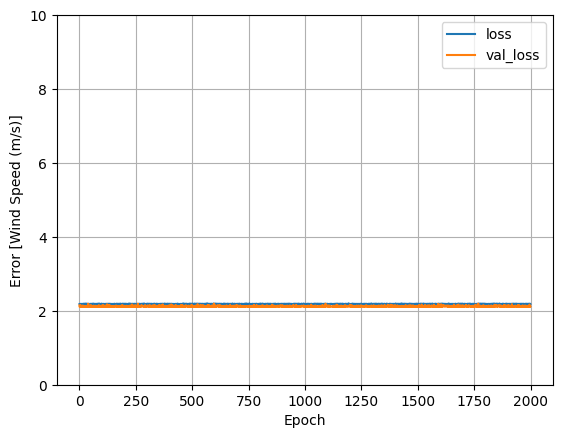

In [34]:
plot_loss(history)

In [35]:
test_results = {}

test_results['pressure_model'] = pressure_model.evaluate(
    test_features['Date'],
    test_labels, verbose=0)

In [36]:
x=tf.linspace(0.0, 50, 51)
y= pressure_model.predict(x)

2/2 [==============================] - 0s 2ms/step


In [37]:
def plot_pressure(x, y):
    plt.scatter(train_features['Date'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Date')
    plt.ylabel('Wind Speed (m/s)')
    plt.legend()

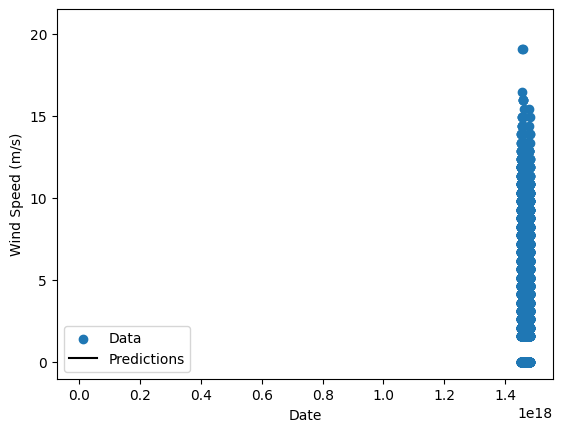

In [38]:
plot_pressure(x, y)